## 1. 문제정의
- 보스턴 집값 데이터 활용 집값 예측하기
- 회귀문제!

## 2. 데이터 수집

In [2]:
import sklearn
sklearn.__version__

'1.2.1'

In [4]:
import pandas as pd
house = pd.read_csv('boston_house_prices.csv', header=1)
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 3. 데이터 전처리
- 생략

## 4. 탐색적 데이터 분석
- 상관관계 분석

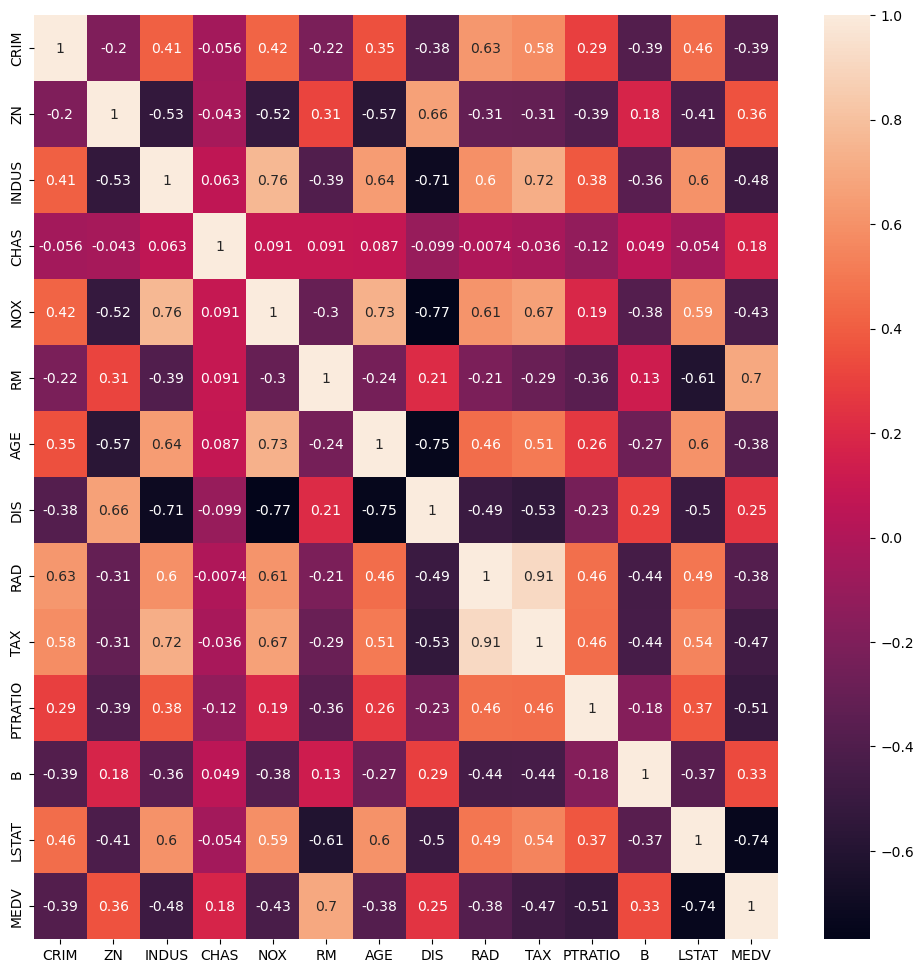

In [5]:
# 상관관계 분석
# -1 ~ 1까지 분포 > 피어슨 상관계수
# 0에 가까울수록 상관관계가 없다.
# 1에 가까울수록 양의 상관관계
## 하나의 값이 커지면 나머지 하나의 값도 커진다.
# -1에 가까울수록 음의 상관관계
## 하나의 값이 커지면 나머지 하나의 값이 작아진다.
# 절대값이 1에 가까울수록 좋은상관관계를 가지고 있다. 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(house.corr(), annot=True) # annot = True : 수치표현
plt.show()

## 5. 모델 선택 및 하이퍼 파라미터 튜닝

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [8]:
house.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [9]:
X = house.loc[ : , 'CRIM' : 'LSTAT']
y = house.loc[ : , 'MEDV']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3)

## 6. 학습

In [12]:
rf.fit(X_train, y_train)

RandomForestRegressor()

## 7. 예측 및 평가

In [13]:
rf.score(X_train, y_train)

0.9834863472283843

In [14]:
rf.score(X_test,y_test)

0.8833658506823776

In [17]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf, X_train, y_train, cv=5)
score

array([0.83593546, 0.90643418, 0.81397374, 0.89220825, 0.82748198])

In [18]:
score.mean()

0.8552067232184539

## Gridsearch

In [19]:
from sklearn.model_selection import GridSearchCV

In [23]:
grid_param = {'max_features' : [0.4, 0.5, 0.6, 0.7], 
             'n_estimators' : [50, 100, 150, 200],
             'max_depth' : [4,5,6,7,8],
             'max_leaf_nodes' : [30,40,50,60]}

In [24]:
grid_search = GridSearchCV(RandomForestRegressor(), grid_param, cv = 5)

In [25]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [0.4, 0.5, 0.6, 0.7],
                         'max_leaf_nodes': [30, 40, 50, 60],
                         'n_estimators': [50, 100, 150, 200]})

In [26]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=8, max_features=0.4, max_leaf_nodes=50,
                      n_estimators=50)

In [27]:
grid_search.best_score_

0.8796483410670731

In [28]:
# max_depth=8, max_features=0.4, max_leaf_nodes=50, n_estimators=50
grid_param = {'max_features' : [0.33, 0.36, 0.39, 0.42, 0.45, 0.48], 
             'n_estimators' : [40, 45, 50, 55, 60],
             'max_depth' : [6,7,8,9,10],
             'max_leaf_nodes' : [50,54,58,62,66,70]}

In [29]:
grid_search = GridSearchCV(RandomForestRegressor(), grid_param, cv = 5)

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'max_features': [0.33, 0.36, 0.39, 0.42, 0.45, 0.48],
                         'max_leaf_nodes': [50, 54, 58, 62, 66, 70],
                         'n_estimators': [40, 45, 50, 55, 60]})

In [33]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=9, max_features=0.39, max_leaf_nodes=66,
                      n_estimators=40)

In [34]:
# max_depth=9, max_features=0.39, max_leaf_nodes=66, n_estimators=40
grid_search.best_score_

0.8833367407166479

In [37]:
grid_search.predict(X_test.iloc[:10])

array([41.16414583, 17.49256522, 20.88605223, 30.01724384, 22.44790687,
       21.24866012, 15.715295  ,  8.39123607, 21.39778424, 17.41302619])

In [36]:
y_test

224    44.8
137    17.1
453    17.8
303    33.1
254    21.9
       ... 
396    12.5
59     19.6
496    19.7
105    19.5
10     15.0
Name: MEDV, Length: 127, dtype: float64

In [ ]:
# 머신러닝 모델 저장하기
# pickle 확장자를 사용한다.

In [38]:
import joblib # 머신러닝 모델 저장 라이브러리

In [39]:
joblib.dump(grid_search, 'house_rf.pkl')

['house_rf.pkl']

In [42]:
load_model = joblib.load('house_rf.pkl')

In [43]:
load_model.predict(X_test.iloc[:10])

array([41.16414583, 17.49256522, 20.88605223, 30.01724384, 22.44790687,
       21.24866012, 15.715295  ,  8.39123607, 21.39778424, 17.41302619])